In [1]:
import pca
from scipy import ndimage
from sklearn.datasets import fetch_lfw_people
import sklearn.decomposition
import Image
%pylab inline
import numba

Populating the interactive namespace from numpy and matplotlib


In [42]:
def project_face(basis, face, mean):
    coefs = np.sum(basis*face, axis=1)[np.newaxis]
    reconst = coefs.dot(basis)
    face = mean + reconst
    return face
def center(X):
    return X - np.mean(X, axis=0)
def average(X):
    return np.mean(X, axis=0)

def show_face(face):
    imshow(face.reshape(50,37), cmap=plt.cm.gray)
    
def approximate_face(face, data, pca): 
    pca.pca_mat[0]
    return project_face(pca.pca_mat,face, average(data)).reshape(50,37)

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [5]:
faces = lfw_people.data
faces_small = faces[:30,:]
faces_small_average = average(faces_small)
faces_small_centered = center(faces_small)


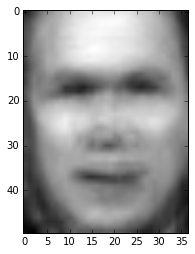

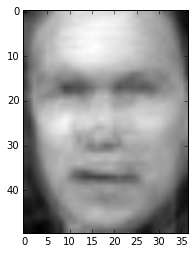

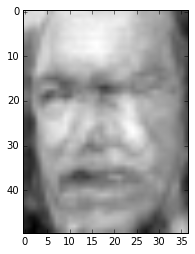

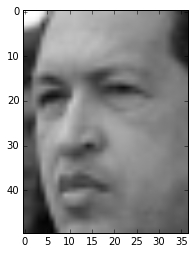

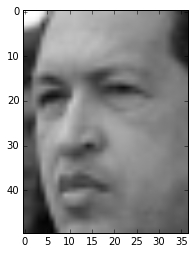

In [48]:
reload(pca)
exact_pcas = [] 
for i in [1,5,10,100,200]:
    exact_pca = pca.ExactPCA(i, faces_small_centered)
    exact_pcas.append(exact_pca)
    plt.figure()
    show_face(approximate_face(faces_small_centered[0, :], faces_small, exact_pca))

In [50]:
reload(pca)
shamir_pcas = [] 
for i in [1,5,10,100,200]:
    shamir_pca = pca.ShamirSGDPCA(i, faces_small_centered)
    shamir_pcas.append(shamir_pca)
    plt.figure()
    show_face(approximate_face(faces_small_centered[0, :], faces_small, shamir_pca))

KeyboardInterrupt: 

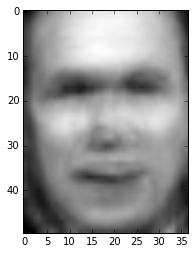

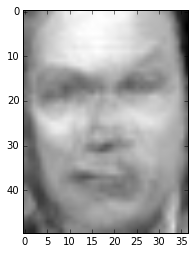

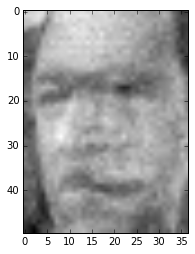

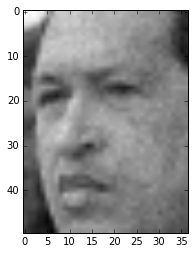

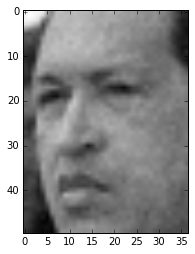

In [47]:
reload(pca)
alecton_pcas = [] 
for i in [1,5,10,100,200]:
    alecton_pca = pca.AlectonPCA(i, faces_small_centered)
    alecton_pcas.append(alecton_pca)
    plt.figure()
    show_face(approximate_face(faces_small_centered[0, :], faces_small, alecton_pca))